# Clean And Analyze Emplyee Exit Surveys
---

We'll work with exit surveys from employees of the [Department of Education, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_and_Training_(Queensland)) (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. You can find the TAFE exit survey [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey) and the survey for the DETE here. We've made some slight modifications to these datasets to make them easier to work with, including changing the encoding to UTF-8 (the original ones are encoded using cp1252.)

The questions that we are trying to answer are:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

Below is a preview of a couple columns we'll work with from the `dete_survey.csv`:

- `ID`: An id used to identify the participant of the survey
- `SeparationType`: The reason why the person's employment ended
- `Cease Date`: The year or month the person's employment ended
- `DETE Start Date`: The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the `tafe_survey.csv`:

- `Record ID`: An id used to identify the participant of the survey
- `Reason for ceasing employment`: The reason why the person's employment ended
- `LengthofServiceOverall. Overall Length of Service at Institute (in years)`: The length of the person's employment (in years)

### Initial Phase

#### 1. Importing Library and CSV

In [1]:
#Importing the required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Setting sns plot to have white background
sns.set_style('white')

#Command to enable plot to be shown
%matplotlib inline

In [2]:
#Importing the CSVs
dete_survey=pd.read_csv('dete_survey.csv')
tafe_survey=pd.read_csv('tafe_survey.csv')

#### 2. Initial Data Reading

In [3]:
#Showing the columns and its datatypes for dete
dete_survey.info()

#Showing the first 3 rows of Dete
dete_survey.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
#Showing the columns and the datatypes of Tafe
tafe_survey.info()

#Showing the first three columns of Tafe
tafe_survey.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN


After briefly skeeming through the two data sets, it can be said that:

- Tafe's survey is much more detailed but quite messy in terms of the column names. Its dataset contains more column which might have possible missing data. Some of the columns are redundant

- Some of Tafe's data is in the form of intervals.

- The Dete's survey contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN

- Different column names for both

#### 3. Filling Not Stated to NaN and Dropping Redundant Columns

In [5]:
#Setting Not Stated in Dete as NaN
dete_survey=pd.read_csv('dete_survey.csv',na_values=['Not Stated'])

In [6]:
#Dropping unnecessary columns
dete_survey_updated=dete_survey.drop(dete_survey.columns[28:49],axis=1)
tafe_survey_updated=tafe_survey.drop(tafe_survey.columns[17:66],axis=1)

In this section we made some changes to both dataset. Dete's survey containts the phrase "Not Stated" throughout the survey, thus we are going to change it into NaN. The second and third changes are just dropping columns that are unnecessary for our analysis.

### Data Cleaning

#### 1. Matching Column Names

In [7]:
#Changing spaces into underscores and transform the strings into lowercase
dete_survey_updated.columns=dete_survey_updated.columns.str.replace(' ','_').str.lower()
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [8]:
#A dictionary to change the names of Tafe's columns
tafe_change={'Record ID':'id','CESSATION YEAR':'cease_date',
             'Reason for ceasing employment':'separationtype',
            'Gender. What is your Gender?':'gender',
            'CurrentAge. Current Age':'age',
            'Employment Type. Employment Type': 'employment_status',
            'Classification. Classification': 'position',
            'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 
             'institute_service',
            'LengthofServiceCurrent. Length of Service at current workplace (in years)': 
             'role_service'}

#Changing the names
tafe_survey_updated.rename(columns=tafe_change,inplace=True)
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

The changes made to the column names have a certain purpose and that purpose is to make it easier when both dataset are merged together and also to lessen the possibility of having multiple columns which practically tells the same information.

#### 2. Filtering Resignation Data

In [9]:
#Initial observation of separation type for Dete
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [10]:
#Initial observation of separation type for Tafe
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [11]:
#Replacing any characters starting from a "-" if it exists
dete_survey_updated['separationtype']=dete_survey_updated[
    'separationtype'].replace('-.*','',regex=True)

In [12]:
#Assigning Dete and Tafe data where separation type is resignation, .copy() is to prevent error
dete_resignations=dete_survey_updated[dete_survey_updated['separationtype']=='Resignation'].copy()
tafe_resignations=tafe_survey_updated[tafe_survey_updated['separationtype']=='Resignation'].copy()

As we can see there, Dete specifies resignation into three categories, since we only need to know whether that person resigns or not, we can select anything characters but the phrase 'Resignation' using regex and replace them with nothing.

#### 3. Cleaning and Validating Date Data

In [13]:
#Observing the different format of cease date
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
2010         1
09/2010      1
07/2006      1
07/2012      1
Name: cease_date, dtype: int64

In [14]:
#Fixing cease date using regex
dete_resignations['cease_date']=dete_resignations['cease_date'].replace(
    '.*/','',regex=True).astype(float)

#Observing if it there fix works
dete_resignations['cease_date'].value_counts().sort_index(ascending=True)

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [15]:
#Observing the format for tafe's cease date
tafe_resignations['cease_date'].value_counts().sort_index(ascending=True)

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

In [16]:
#Observing any irregularities of Dete's start date (must not be earlier than 1940 and greater than 2014)
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=True)

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

Based on the value counts for cease date (for both) and dete start date, there are no irregularities in the data. The years for both Dete and Tafe do not span the same number of years.

##### Creating Years of Service Column for Dete

In [17]:
#Creating year of service column for Dete by subtracting start date from cease date
dete_resignations['institute_service']=(dete_resignations['cease_date']-
                                        dete_resignations['dete_start_date'])
dete_resignations['institute_service'].value_counts().head(5)

5.0    23
1.0    22
3.0    20
0.0    20
6.0    17
Name: institute_service, dtype: int64

The idea for creating a years of service column called 'institute_service' is because we are trying to find whether employees that works for a certain tenure resigns due to dissatisfaction. Tafe's dataset has already included this calculation

#### 4. Finding Resignation Due to Dissatisfaction

In [18]:
#Observing the unique output and its values for Tafe's dissatisfaction
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [19]:
#Observing the unique ouput for Job Dissatisfaction
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [20]:
#A function to convert the values of Tafe's dissatisfaction
def update_vals(any):
    if any=='-':return False
    if pd.isnull(any):return np.nan
    else:return True 

In [21]:
#Applying the function to the required columns
tafe_resignations[['Contributing Factors. Job Dissatisfaction',
                   'Contributing Factors. Dissatisfaction']]=tafe_resignations[
                ['Contributing Factors. Job Dissatisfaction',
                 'Contributing Factors. Dissatisfaction']].applymap(update_vals)

In [22]:
#Creating a dissatisfied column for Tafe
tafe_resignations['dissatisfied']=tafe_resignations[['Contributing Factors. Job Dissatisfaction',
                   'Contributing Factors. Dissatisfaction']].any(axis=1,skipna=False)

#Creating a copy so it wont show an error
tafe_resignations_up=tafe_resignations.copy()

In [23]:
#Creating a dissatisfied column for Dete
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
'dissatisfaction_with_the_department','physical_work_environment',
'lack_of_recognition','lack_of_job_security','work_location',
'employment_conditions','work_life_balance','workload']].any(axis=1, skipna=False)

#Creating a copy of Dete
dete_resignations_up = dete_resignations.copy()


In this section we are trying to update the value for Tafe's 'Contributing Factors. Dissatisfaction' and 'Contributing Factors. Job Dissatisfaction' columns using the update_val function above since its value was either -, some string or NaN. 

After that is done, we create a new column for both datasets called 'dissatisfied' where we read columns that might indicate dissatisfaction that leads to resignation and put the value True, False or NaN. This is done in order to simplify our work.

#### 5. Combining the Datasets

In [24]:
#Creating a column to denote where that data came from
dete_resignations_up['institute']='DETE'
tafe_resignations_up['institute']='TAFE'

In [25]:
#Combining the two dataframe together
combined=pd.concat([dete_resignations_up,tafe_resignations_up],
                   ignore_index=True)

In [26]:
#Dropping columns which has more than 500 null values
combined_updated=combined.dropna(thresh=500,axis=1)

In [27]:
#Showing the columns and its datatypes
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    float64
 3   position           598 non-null    object 
 4   employment_status  597 non-null    object 
 5   gender             592 non-null    object 
 6   age                596 non-null    object 
 7   institute_service  563 non-null    object 
 8   dissatisfied       643 non-null    object 
 9   institute          651 non-null    object 
dtypes: float64(2), object(8)
memory usage: 51.0+ KB


Here we are combining the two datasets that we have modified so far into one big dataset. The reason why we are using pd.concat instead of pd.merge is that we are not necessarily joining them based on any key just yet (outer join). After joining them together, we are dropping columns that have more than 500 null values

#### 6. Updating Years of Service Into A String Based Category

In [28]:
#Observing the pattern for years of service
combined['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
14.0                   6
17.0                   6
12.0                   6
10.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
23.0                   4
11.0                   4
39.0                   3
19.0                   3
21.0                   3
32.0                   3
36.0                   2
25.0                   2
26.0                   2
28.0                   2
30.0                   2
42.0                   1


As seen from the series above, some of the institute service are not floats, rather strings which denotes intervals, thus there is a need to convert them into floats.

In [29]:
#Using regex to parse only the numbers, (\d+) is to find only the numbers
combined['institute_service']=combined['institute_service'].astype(
    str).str.extract(r'(\d+)',expand=False).astype(float)

#Showing the first five value
combined['institute_service'].value_counts().head(5)

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
Name: institute_service, dtype: int64

In [30]:
#A function to assign the category for years of service
def car_stage(val):
    if pd.isnull(val):return np.nan
    elif val<3:return 'New'
    elif val<=6:return 'Experienced'
    elif val<=10:return 'Established'
    elif val>=11:return 'Veteran'

In [31]:
#Applying the function to a series
combined['service_cat']=combined['institute_service'].apply(car_stage)
combined['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

After turning all the institute service into the desired floats, we categorized it using a function called 'car_stage'. The function categorized based on the following intervals based on the amount of years they spent working there:

- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

#### 7. Cleaning the Age Category

In [32]:
#Observing the pattern for age
combined['age'].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
26  30           32
36  40           32
31  35           32
31-35            29
21-25            29
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [33]:
#Using regex to replace similar values
combined['age_bracket']=combined['age'].replace(['(  )','(61 or older)|(56-60)'],
                                            ['-','56 or older'],regex=True)

#Filling na with unspecified
combined['age_bracket']=combined['age_bracket'].fillna('Unspecified')

#Observing the changes
combined['age_bracket'].value_counts(dropna=False)

41-45            93
46-50            81
56 or older      78
36-40            73
51-55            71
26-30            67
21-25            62
31-35            61
Unspecified      55
20 or younger    10
Name: age_bracket, dtype: int64

### Analysis

#### 1. Dissatisfaction and Years of Service

In [34]:
combined['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [35]:
#Filling NaN with False
combined['dissatisfied']=combined['dissatisfied'].fillna(False)

(0.0, 0.6)

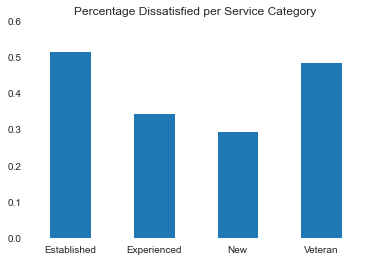

In [62]:
#Creating a pivot table
pv_discat=combined.pivot_table('dissatisfied','service_cat')

#Plotting the pivot table
plt1=pv_discat.plot(kind='bar',
               title='Percentage Dissatisfied per Service Category',
              legend=False)

#Turning spines off and visual modification
for key, spine in plt1.spines.items():
    spine.set_visible(False)
plt.xlabel(None)
plt.xticks(rotation=0)
plt.ylim(0,0.6)

As we can see from the graph, most of the dissatisfied resignation comes from workers who are relatively established in the institution closely followed by the veterans. New workers are those who are less likely to resign due to dissatisfaction.

#### 2. Dissatisfaction and Age

(0.0, 0.6)

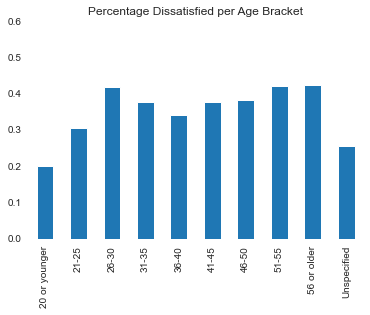

In [61]:
#Creating a pivot table
pv_disbra=combined.pivot_table('dissatisfied','age_bracket')

#Plotting the pivot table
plt2=pv_disbra.plot(kind='bar',
               title='Percentage Dissatisfied per Age Bracket',
              legend=False)

#Visual modifications
for key, spine in plt2.spines.items():
    spine.set_visible(False)
plt.xlabel(None)
plt.xticks(rotation=90)
plt.ylim(0,0.6)

The graphic above tells us that most of the resignation due to dissatisfaction happens either on the age range of 26 to 30, 51 to 55, and 56 or older. Workers who are 20 or younger are less likely to resign due to disatisfaction.

#### 3. Dissatisfaction and Institution

(0.0, 0.6)

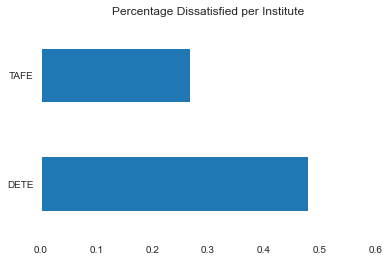

In [60]:
#Creating the pivot table
pv_disins=combined.pivot_table('dissatisfied','institute')

#Plotting the pivot table
plt3=pv_disins.plot(kind='barh',
               title='Percentage Dissatisfied per Institute',
              legend=False)

#Visual enhancements
for key, spine in plt3.spines.items():
    spine.set_visible(False)
plt.xticks(rotation=0)
plt.ylabel(None)
plt.xlim(0,0.6)

Based on the given data from both institution, more DETE employees resigned due to some sort of dissatisfaction compared to TAFE employees.

### Conclusion 

From this exercise, we can gather a few conclusions regarding to the data, which are:

1. Resignation due to dissatisfaction happens more to established workers and vetrans rather than new commers.
2. Resignation due to dissatisfaction happens more for the age bracket 26 to 30, 51 to 55, and 56 or older.
3. DETE is much more prone to resignation due to dissatisfaction compared to TAFE